# 1장 헬로 파이썬

리스트, 딕셔너리, bool, if문, for문, 함수, 클래스

In [98]:
class Man:
    def __init__(self, name):
        self.name = name
        print("Ininialized!")
        
    def hello(self):
        print("Hello" + self.name + "!")
        
    def goodbye(self):
        print("Good-bye" + self.name + "1")

In [5]:
m = Man("David")
m.hello()
m.goodbye()

Ininialized!
HelloDavid!
Good-byeDavid1


### 넘파이

In [147]:
import numpy as np

In [8]:
x = np.array([1.0, 2.0, 3.0])
print(x)
type(x)

[1. 2. 3.]


numpy.ndarray

In [14]:
import numpy as np
A = np.array([[1,2], [3,4]])
print(A)
A.shape
A.dtype

[[1 2]
 [3 4]]


dtype('int64')

In [15]:
A.shape

(2, 2)

In [17]:
B = np.array([[3, 0], [0, 6]])

In [18]:
A + B

array([[ 4,  2],
       [ 3, 10]])

In [19]:
A * B

array([[ 3,  0],
       [ 0, 24]])

### 브로드캐스트

In [20]:
A = np.array([[1,2], [3,4]])
B = np.array([10, 20])
A*B

array([[10, 40],
       [30, 80]])

In [21]:
X = np.array([[51,55], [14, 19], [0, 4]])
print(X)

[[51 55]
 [14 19]
 [ 0  4]]


In [23]:
print(X[0])
X[0][1]

[51 55]


55

In [25]:
for row in X:
    print(row)

[51 55]
[14 19]
[0 4]


In [26]:
X = X.flatten()
print(X)

[51 55 14 19  0  4]


In [27]:
X[np.array([0,2,4])]

array([51, 14,  0])

In [28]:
X > 15

array([ True,  True, False,  True, False, False])

In [29]:
X[X>15]

array([51, 55, 19])

## 단순한그래프 그리기

In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# 데이터 준비
x = np.arange(0, 6, 0.1) # 0에서 6까지 0.1간격으로 생성
y = np.sin(x)

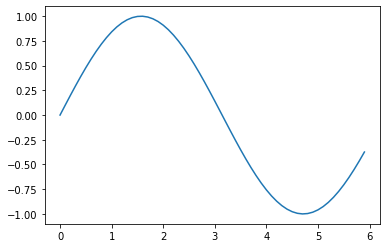

In [33]:
#그래프 그리기
plt.plot(x,y)
plt.show()

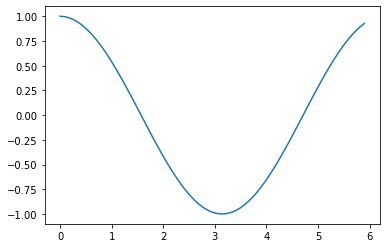

In [42]:
x = np.arange(0, 6, 0.1)
y = np.cos(x)

plt.plot(x,y)
plt.show()

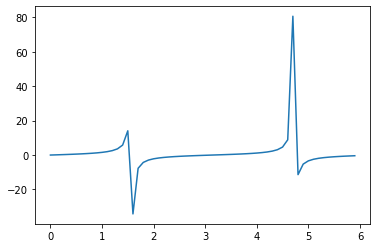

In [43]:
x = np.arange(0, 6, 0.1)
y = np.tan(x)

plt.plot(x,y)
plt.show()

 1. 넘파이의 arange 메서드로 [0, 0.1, 0.2, ....., 5.8, 5.9]라는 데이터를 생성하여 변수 x에 할당
 2. x의 각 원소에 넘파이의 sin, cos, tan 함수인 np.sin()을 적용하여 변수y에 할당
 3. x와y를 인수로 plt.plot메서드를 호출해 그래프를 그린다
 4. plt.show()를 호출해 그래프를 화면에 출력하고 끝낸다

### pyplot의 기능
제목과 각 축의 이름(레이블) 표시 등, pyplot의 다른기능 사용

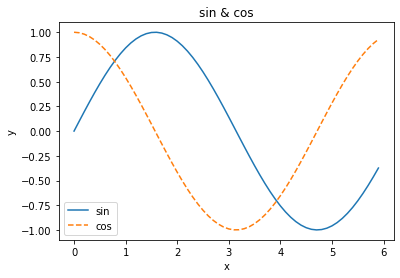

In [46]:
import numpy as np
import matplotlib.pyplot as plt

#데이터 준비
x = np.arange(0, 6, 0.1)
y1 = np.sin(x)
y2 = np.cos(x)

#그래프 그리기
plt.plot(x, y1, label="sin")
plt.plot(x, y2, linestyle = "--", label = "cos") # cos함수는 점선으로 그리기
plt.xlabel("x") # x축 이름
plt.ylabel("y") # y축 이름
plt.title('sin & cos') # 제목
plt.legend()
plt.show()

### 이미지 표시하기
1. pyplot에는 이미지를 표시해주는 메서드인 imshow()도 있다.
2. 이미지를 읽어들일 때는 matpoltlib.image 모듈의 imread()메서드를 이용

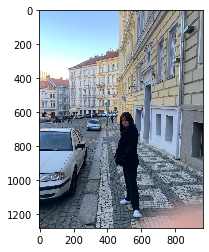

In [67]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('minjoo.jpg')

plt.imshow(img)
plt.show()

## 1장 정리
1. o 파이썬은 간단하고 익히기 쉬운 프로그래밍 언어다
2. o 파이썬은 오픈 소스여서 자유롭게 사용할 수 있다.
3. o 이 책은 딥러닝 구현에 파이썬 3버전을 이용한다.
4. o 외부 라이브러리로는 넘파이와 matplotlib을 이용한다.
5. o 파이썬을 실행하는 방식에는 '인터프리터'와 '스크립트 파일' 두 가지가 있다.
6. o 파이썬에는 함수와 클래스 같은 모듈로 구현을 정리할 수 있다.
7. o 넘파이는 다차원 배열을 다루는 편리한 메서드를 많이 제공한다.


# 2장 퍼셉트론 구현하기

In [70]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [72]:
print(AND(0,0))
print(AND(0,1))
print(AND(1,0))
print(AND(1,1))

0
0
0
1


### 가중치와 편향도입

In [73]:
import numpy as np

x = np.array([0,1]) # 입력
w = np.array([0.5, 0.5]) # 가중치
b = -0.7 # 편향

w*x

array([0. , 0.5])

In [74]:
np.sum(w*x)

0.5

In [76]:
np.sum(w*x) + b # 대략 -0.2 부동소수점에 의한 연산 오차

-0.19999999999999996

### 가중치와 편향 구하기

In [95]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    
    tmp = np.sum(w*x) + b
    
    if tmp <= 0:
        return 0
    elif tmp > 0:
        return 1

In [96]:
print(AND(0,0))
print(AND(0,1))
print(AND(1,0))
print(AND(1,1))

0
0
0
1


In [90]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5]) # AND와는 가중치(w 와 b)만 다르다!
    b = 0.7
    
    tmp = np.sum(w*x) + b
    
    if tmp <= 0:
        return 0
    elif tmp > 0:
        return 1

def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    
    tmp = np.sum(w*x) + b
    
    if tmp <= 0:
        return 0
    elif tmp > 0:
        return 1

In [92]:
print("NAND게이트")
print(NAND(0,0))
print(NAND(0,1))
print(NAND(1,0))
print(NAND(1,1))
print("OR게이트")
print(OR(0,0))
print(OR(0,1))
print(OR(1,0))
print(OR(1,1))

NAND게이트
1
1
1
0
OR게이트
0
1
1
1


### 퍼셉트론을 이용하여 XOR게이트 구현하기

In [97]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y
print(XOR(0,0))
print(XOR(0,1))
print(XOR(1,0))
print(XOR(1,1))

0
1
1
0


## 2장 정리
1. 퍼셉트론은 입출력 갖춘 알고리즘이다. 입력을 주면 정해진 규칙에 따른 값을 출력한다.
2. 퍼셉트론에서는 '가중치'와 '편향'을 매개변수로 설정한다.
3. 퍼세트론으로는 AND, OR게이트 등의 논리회로를 표현할 수 있다.
4. XOR게이트는 단층 퍼셉틀혼으로는 표현할 수 없다.
5. 2층 퍼셉트론을 이용하면 XOR게이트를 표현할 수 있다.
6. 단층 퍼셉트론은 직선형 영역만 표현할 수 있고, 다층 퍼셉트론은 비선형 영역도 표현할 수 있다.
7. 다층 퍼셉트론은 (이론상) 컴퓨터를 표현할 수 있다.

# 3장 신경망

활성화 함수 : 입력신호의 총합을 출력 신호로 변환하는 함수(입력신호의 총합이 활성화를 일으키는지를 정하는 역할)

1. 단순 퍼셉트론 : 단층 네트워크에서 계단 함수(임계값을 경계로 출력이 바뀌는 함수)를 활성화 함수로 사용한 모델
2. 다층 퍼셉트론 : 신경망(여러 층으로 구성되고 시그모이드 함수 등의 매끈한 활성화 함수를 사용하는 네트워크)을 가리킨다.

#### 시그모이드 함수 
##### h(x) = 1 / 1 + exp(-x)
e는 자연상수로 2.7182...의 값을 갖는 실수

### 계단 함수 구현하기

In [98]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

이 구현은 인수 x는 실수(부동소수점)만 받아들인다. 즉, step_function(3.0)은 되지만 넘파이 배열을 인수로 넣을 수는 없다.
가령 step_function(np.array([1.0], [2.0])는 안된다.

In [99]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [100]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [101]:
y = x >0

In [102]:
y

array([False,  True,  True])

In [103]:
type(y)

numpy.ndarray

In [107]:
y = y.astype(np.int) #astype() 메서드를 통하여 자료형 변환

In [108]:
y # False = 0, True = 1의 값으로 출력이 된다

array([0, 1, 1])

### 계단 함수의 그래프

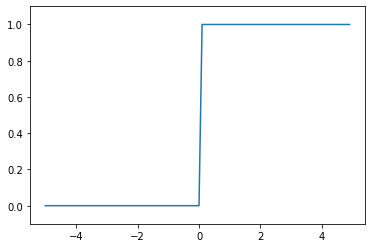

In [115]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

plt.plot(x,y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정\
plt.show()

### 시그모이드 함수 구현하기

In [120]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x)) # 인수 x가 넘파이 배열이어도 가능

In [122]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [124]:
t = np.array([1.0, 2.0, 3.0])
1.0 + t

array([2., 3., 4.])

### 시그모이드 함수의 그래프

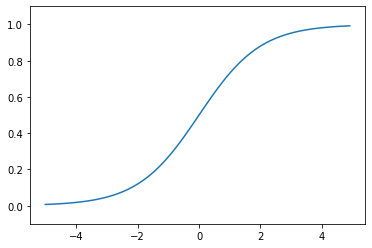

In [125]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

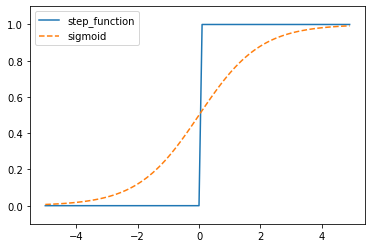

In [127]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = step_function(x)
y2 = sigmoid(x)

plt.plot(x, y1, label = "step_function")
plt.plot(x,y2, linestyle = "--", label = "sigmoid")
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()

### ReLU 함수

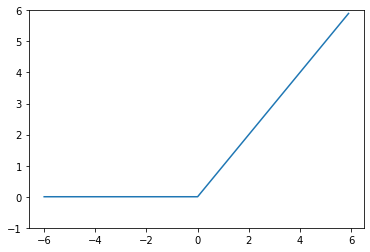

In [130]:
def relu(x):
    return np.maximum(0, x) # np.maximum 메서드는 입력된 두 값중 큰값을 반환

x = np.arange(-6.0, 6.0, 0.1)
y = relu(x)

plt.plot(x,y)
plt.ylim(-1.0, 6.0)
plt.show()

### 다차원배열의 계산
#### 다차원 배열

1차원 배열

In [131]:
import numpy as np
A = np.array([1, 2, 3, 4])
print(A)

[1 2 3 4]


In [134]:
np.ndim(A) # 배열의 차수를 알수 있게 해주는 메서드

1

In [133]:
A.shape # 배열의 형상은 인스턴트 변수인 shape사용

(4,)

In [139]:
A.shape[0] # A.shape이 튜플을 반환하는것에 주의

4

2차원 배열

In [140]:
B = np.array([[1,2], [3,4], [5,6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [141]:
np.ndim(B)

2

In [142]:
B.shape

(3, 2)

2차원 배열은 행렬(matrix)라고 부르고 배열의 가로방향을 행(row), 세로방향을 열(column)라고 한다

#### 행렬의 곱

In [143]:
A = np.array([[1,2], [3,4]])
B = np.array([[5,6], [7,8]])

np.dot(A, B)

array([[19, 22],
       [43, 50]])

In [144]:
A = np.array([[1,2,3], [4,5,6]])
B = np.array([[1,2], [3,4], [5,6]])

np.dot(A,B)

array([[22, 28],
       [49, 64]])

#### 신경망에서의 행렬 곱

In [145]:
X = np.array([1,2])
W = np.array([[1,3,5], [2,4,6]])

Y = np.dot(X, W)
print(Y)

[ 5 11 17]


In [148]:
print(X.shape)
print(W.shape)
print(Y.shape)

(2,)
(2, 3)
(3,)


이와 같이 입력 2, 2*3, 3출력 (2 = 2, 3 =3 이 일치하여야 한다)

#### 각 층의 신호전달

In [158]:
# 입력층에서 1층(은닉층)으로 전달
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

X = np.array([1.0, 0.5]) # [x1, x2]
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]) # [w11(1), w21(1), w31(1)], [w12(1), w22(1), w32(1)]
B1 = np.array([0.1, 0.2, 0.3]) # [b1(1), b2(1), b3(1)]

print(X.shape)
print(W1.shape)
print(B1.shape)

A1 =  np.dot(X, W1) + B1
Z1 = sigmoid(A1)
print(A1)
print(Z1)


(2,)
(2, 3)
(3,)
[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [160]:
# 1층(은닉층)에서 2층(은닉층)으로 전달
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]]) # [w11(2), w21(2)], [w12(2), w22(2)], [w13(2), w23(2)]
B2 = np.array([0.1, 0.2]) #[b1(2), b2(2)]

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
print(A2)
print(Z2)

(3,)
(3, 2)
(2,)
[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


In [163]:
# 2층(은닉층)에서 출력층으로 전달
def identity_function(x): # 출력층의 활성화 함수
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3) # 혹은 Y = A3

print(Y)

[0.31682708 0.69627909]


### 구현 정리

In [164]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def identity_function(x):
    return x

def init_network(): # 가중치와 편향을 초기화하고 이들을 딕셔너리 변수인 network에 저장한다.
    network = {} # 이 딕셔너리 변수에는 각 층에 필요한 매개변수(가중치와 편향)를 저장한다.
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]) # [w11(1), w21(1), w31(1)], [w12(1), w22(1), w32(1)]
    network['b1'] = np.array([0.1, 0.2, 0.3]) # [b1(1), b2(1), b3(1)]
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]]) # [w11(2), w21(2)], [w12(2), w22(2)], [w13(2), w23(2)]
    network['b2'] = np.array([0.1, 0.2]) #[b1(2), b2(2)]
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]]) # [w11(3), w21(3)], [w12(3), w22(3)]
    network['b3'] = np.array([0.1, 0.2]) # [b1(3), b2(3)]
    
    return network

def forward(network, x): # 입력 신호를 출력으로 변환하는 처리과정을 모두 구현
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


### 출력층 설계

1. 신경망은 분류와 회귀 모두에 이용할수 있다. 다만 둘 중 어떤 문제냐에 따라 출력층에서 사용하는 활성화 함수가 달라진다.
2. 일반적으로 회귀에는 항등 함수를, 분류에는 소프트맥스 함수를 사용한다.
3. 기계학습 문제는 분류(classification)와 회귀(regression)로 나뉜다.
4. 분류는 데이터가 어느 클래스에 속하느냐 문제이다, 사진 속 인물의 성별을 분류하는 문제가 여기에 속한다.
5. 회귀는 입력 데이터에서 (연속적인) 수치를 예측하는 문제이다, 사진 속 인물의 몸무게(57.4kg?)를 예측하는 문제가 여기에 속한다.

항등 함수(identity function)는 입력을 그대로 출력한다. 입력과 출력이 같다는 뜻의 항등이다.

### 소프트맥스 함수(softmax function)

Yk = exp(ak) / n SUM i=1 exp(ai)

##### 소프트맥스 함수 구현

In [165]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a) #지수 함수
print(exp_a)

sum_exp_a = np.sum(exp_a) #지수 함수의 합
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [167]:
# overflow 문제점이 있는 수식
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

오버플로 문제점 개선하기

In [2]:
import numpy as np
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a)) # 소프트맥스 함수의 계산 제대로 이루어 지지 않음

c = np.max(a) # c = 1010 (최댓값)
a - c

np.exp(a - c) / np.sum(np.exp(a - c))


/home/sumjack/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/home/sumjack/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [16]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a -c) # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

### 소프트맥스 함수의 특징

In [172]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


1. 소프트맥스 함수의 출력은 0에서 1.0사이의 실수 이다
2. 소프트맥스 함수출력의 총합은 1이다.
3. 이 성질 덕분에 소프트맥스 함수의 출력을 '확률'로 해석 할 수 있다.
4. y[0]의 확률은 0.018(1.8%), y[1]의 확률은 0.245(24.5%), y[2]의 확률은 0.737(73.7%)로 해석할 수 있다. 이 결과 확률들로부터 "2번째 원소의 확률이 가장 높으니 답은 2번째 클래스이다"라고 할 수 있다.
5. 소프트맥스 함수를 이용함으로써 문제를 확률적(통계적)으로 대응할 수 있게 된다.
6. 주의점, 소프트맥스 함수를 적용해도 각 원소의 대소 관계는 변하지 않는다. 지수함수 y = exp(x)가 단조 증가 함수이기 떄문이다.
*단조증가함수란 정의역 원소 a,b가 a <= b 일 때, f(a) <= f(b)가 성립하는 함수이다.


### 손글씨 숫자 인식

In [12]:
import sys, os
sys.path.append(os.pardir) # 부모 디렉터리 파일을 가져올수 있도록 설정
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)

#각 데이터의 형상 출력
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


#### 세가지의 인수가 존재 normalize, flatten, one_hot_label

#### flatten은 입력이미지를 평탄하게, 즉 1차원 배열로 만들지를 정한다. False로 설정하면 입력이미지를 1 X 28 X 28의 3차원 배열로, True로 설정하면 784개의 원소로 이뤄진 1차원 배열로 저장

#### normalize는 입력 이미지의 픽셀값을 0.0에서 1.0사이의 값으로 정규화 할지를 정한다. False로 설정하면 입력 이미지의 픽셀 값을 원래 닶 그대로 0~255사이의 값을 유지한다.

#### one_hot_label은 레이블을 원-핫 인코딩 형태로 저장할지를 정한다. 원-핫 인코딩이란, 예를 들어 [0,0,1,0,0,0,0,0,0,0] 처럼 정답을 뜻하는 원소만 1이고(hot하게) 나머지는 모두 0인 배열이다. one_hat_label이 false면 '7'이나 '2'와 같이 숫자 형태의 레이블을 저장하고, True일 때는 레이븡릉 원-핫 인코딩하여 저장한다.

In [26]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show
    
(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten = True, normalize = False)

img = x_train[1]
label = t_train[1]
print(label)

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

img_show(img)

0
(784,)
(28, 28)


In [27]:
Image.fromarray(np.uint8(img))

### 신경망의 추론 처리

In [28]:
import pickle
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(normalize = True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
        
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [29]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
# predict함수는 각 레이블의 확률을 넘파이 배열로 봔한 예를들어 [0.1, 0.3, 0.2,...,0.4]같은 배열이 반환되며,
# 이는 이미지가 숫자 '0'일 확률이 0.1, '1'일 확률이 0.3 식으로 해석

    p = np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1
        
print("Accuracy : " + str(float(accuracy_cnt) / len(x)))
# 0.9352는 올바르게 분류한 비율이 '93.52%'이다라는 뜻이다.

Accuracy : 0.9352


### 배치 처리

In [34]:
print(list(range(0,10)))
print(list(range(0,10,3)))

# range()함수는 range(start, end)처럼 인수를 2개 지정해 호출하면 start에서 end-1까지의 정수로 이뤄진 리스트를 반환한다.
# range(start, end, step)처럼 인수를 3개 지정하면 start에서 end-1까지 step간격으로 증가하는 리스트를 반환

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 3, 6, 9]


In [37]:
x, t = get_data()
network = init_network()

batch_size = 100 # 배치크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size): 
    x_batch = x[i:i+batch_size] # 입력데이터의 i번째부터 i+batch_size번째까지의 데이터를 묶는다.
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1) # argmax()는 최댓값의 인덱스를 가져온다.
    # axis = 1 이는 100X10의 배열 중 1번째 차원을 구성하는 각 원소에서(1번째 차원을 축으로) 최댓값의 인덱스를 찾도록 한 것이다.
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
    
print("Accuracy :" + str(float(accuracy_cnt) / len(x)))

Accuracy :0.9352


#### axis예제

In [39]:
x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6], [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
y = np.argmax(x, axis = 1)
print(y)

[1 2 1 0]


In [40]:
y = np.array([1,2,1,0])
t = np.array([1,2,0,0])
print(y == t)

[ True  True False  True]


In [41]:
np.sum(y == t)

3

## 정리

1. 신경망에서는 활성화 함수로 시그모이드 함수와 ReLU 함수 같은 매끄럽게 변화하는 함수를 이용한다.
*앞서 배웠던 퍼셉트론 에서는 활성화 함수로 계단 함수를 사용
2. 넘파이의 다차원 배열을 잘 사용하면 신경망을 효율적으로 구현할 수 있다.
3. 기계학습 문제는 크게 회귀와 분류로 나눌 수 있다.
4. 출력층의 활성화 함수로는 회귀에서는 주로 항등 함수를, 분류에서는 주로 소프트맥스 함수를 이용한다.
5. 분류에서는 출력층의 뉴런 수를 분류하려는 클래스 수와 같게 설정한다.
6. 입력 데이터를 묶은 것을 배치라 하며, 추론 처리를 이 배치 단위로 진행하면 결과를 훨씬 빠르게 얻을 수 있다.
이번 장에서는 신경망의 순전파를 배웠다. 설명한 신경망은 각 층의 뉴런들이 다음 층의 뉴런으로 신호를 전달한다는 점에서 앞 장의 퍼셉트론과 같다. 하지만 다음 뉴런으로 갈 때 신호를 변화시키는 활성화 함수에 큰 차이가 있다. 

# 신경망 학습

* 신경망 학습, 학습이란 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것을 뜻한다.
* 신경망이 학습할 수 있도록 해주는 지표인 손실 함수를 소개해준다.
* 손실 함수의 결괏값을 가장 작게 만드는 가중치 매개변수를 찾는 것이 학습의 목표이다.
* 이번 장에서는 손실 함수의 값을 가급적 작게 만드는 기법으로, 함수의 기울기를 활용하는 경사법을 소개한다.

### 평균 제곱 오차

In [42]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [49]:
t = [0, 0, 1, 0, 0, 0 ,0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0]

In [45]:
mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [51]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.1, 0.6]

In [47]:
mean_squared_error(np.array(y), np.array(t))

0.6025

### 교차 엔트로피 오차

In [67]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t*np.log(y + delta))

In [ ]:
t = [0, 0, 1, 0, 0, 0 ,0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0]

In [50]:
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [ ]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.1, 0.6]

In [52]:
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

### 미니배치 학습

In [2]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize = True, one_hot_label = True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [5]:
# 무작위로 데이터 색출
import numpy as np

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size) # np.random.choice(60000, 10)은 0 이상 60000미만의 수 중에서 무작위로 10개를 고른다.
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [7]:
np.random.choice(60000, 10)

array([20502, 41688, 10222, 35072, 17041, 26807, 49208, 15175,  9087,
       46682])

In [9]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y + 1e-7)) / batch_size
# y는 신경망의 출려, t는 정답레이블

In [11]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y[np.arange(batch_size), t])) / batch_size
# 정답 레이블이 원-핫 인코딩이 아니라 '2'나 '7'등의 숫자 레이블로 주어졌을 때의 교차 엔트로피

## 신경망을 학습할 때 정확도를 지표로 삼아서는 안 된다. 정확도를 지표로 하면 매개변수의 미분이 대부분의 장소에서 0이 되기 떄문이다.

### 수치 미분

In [47]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

* 여기에서 하는 것처럼 아주 작은 차분으로 미분하는 것을 '수치 미분'이라 한다.
* 수식을 전개해 미분하는 것은 해석적(analytic)이라는 말을 이용하여 '해석적 해' 혹은 '해석적으로 미분한다'등으로 표현한다.
* 해석적 미분은 오차를 포함하지 않는 '진정한 미분'값을 구해준다

### 수치미분의 예

In [44]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

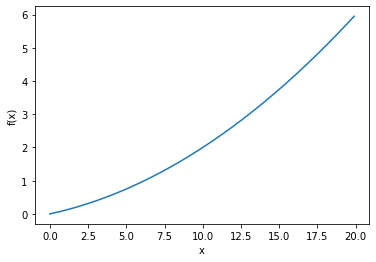

In [45]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1) #0에서 20까지 0.1 간격의 배열 x를 만든다(20은 미포함)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

In [48]:
# x는 5일 때와 10일 때 이함수의 미분을 계산해본다.
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


### 편미분

In [49]:
def function_2(x):
    return x[0]**2 + x[1]**2
    # 또는 return np.sum(x**2)

In [50]:
# 문제 : x0 = 3, x1 = 4일때 x0에 대한 편미분을 구하라
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0

# 문제 : x1에대한 편미분을 구하라
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

In [51]:
print(numerical_diff(function_tmp1, 3.0))
print(numerical_diff(function_tmp2, 4.0))

6.00000000000378
7.999999999999119


### 기울기

In [52]:
def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad

In [53]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [54]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [55]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

#### 기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향이다.

WARNING_함수가 극솟값, 최솟값, 또 안장점(saddle point)이 되는 장소에서는 기울기가 0입니다. 극솟값은 국소적은 최솟값, 즉 환정된 범위에서의 최솟값인 점이다. 안장점은 어느 방향에서 보면 극댓값이고 다른 방향에서 보면 극솟값이 되는 점이다. 경사법은 기울기가 0인 장소를 찾지만 그것이 반드시 최솟값이라고는 할수 없습니다(극솟값이나 안장점일 가능성이 있습니다.) 또, 복잡하고 찌그러진 모양의 함수라면 (대부분) 평평한 곳으로 파고들면서 고원(plateau,플래토)이라 하는, 학습이 진행되지 않는 정체기에 빠질 수 있습니다.

### 경사 하강법

In [56]:
def gradient_descent(f, init_x, lr=0.01, step_num = 100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

print(gradient_descent)

<function gradient_descent at 0x7f5eea343e18>


In [57]:
print(x)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1
 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5
 12.6 12.7 12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9
 14.  14.1 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9 15.  15.1 15.2 15.3
 15.4 15.5 15.6 15.7 15.8 15.9 16.  16.1 16.2 16.3 16.4 16.5 16.6 16.7
 16.8 16.9 17.  17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18.  18.1
 18.2 18.3 18.4 18.5 18.6 18.7 18.8 18.9 19.  19.1 19.2 19.3 19.4 19.5
 19.6 

In [58]:
import tensorflow as tf
tf.__version__

'1.5.0'

#### 경사법으로 f(x(0), x(1)) = x^2(0) + x^2(1)의 최솟값을 구하라

In [59]:
import numpy as np

def gradient_descent(f, init_x, lr=0.01, step_num = 100):
    x = init_x

def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100))

None


In [60]:
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100))

None


In [61]:
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100))

None


In [74]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화
        
    def predict(self, x):
        return np.dot(x, self.W)
    
    def cross_entropy_error(y, t):
        if y.ndim == 1:
            t = t.reshape(1, t.size)
            y = y.reshape(1, y.size)
        
        batch_size = y.shape[0]
        return -np.sum(t*np.log(y[np.arange(batch_size), t])) / batch_size
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [76]:
net = simpleNet()
print(net.W)

[[ 0.46185437  1.4916206   0.93119755]
 [-1.46042314 -0.07364829  0.46990251]]


In [77]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[-1.03726821  0.8286889   0.98163079]


In [78]:
np.argmax(p)

2

In [79]:
t = np.array([0, 0, 1])
net.loss(x, t)

0.6886273780261767

In [80]:
def f(W):
    return net.loss(x,t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.04002094  0.25862005 -0.29864099]
 [ 0.06003141  0.38793007 -0.44796149]]


In [81]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

### 학습 알고리즘 구현하기

- 전제 :
    신경망에는 적응 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 '학습'이라 한다.
- 1단계 -미니배치 :
    훈련 데이터 중 일부를 무작위로 가져온다. 이렇게 선별한 데이터를 미니배치라 하며, 그 미니배치의 손실함수 값을 줄이는것이 목표이다.
- 2단계 -기울기 산출 : 
    미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다. 기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시한다.
- 3단계 -매개변수 갱신 : 가중치 매개변수를 기울기 방향으로 아주 조금 갱신한다.
- 4단계 -반복 : 1~3단계를 반복한다.

### 2층 신경망 클래스 구현하기

In [18]:
import sys, os
import numpy as np
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum( y == t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x,t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    
    def fradinet(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.parans['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [19]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
net.params['W1'].shape
net.params['b1'].shape
net.params['W2'].shape
net.params['b2'].shape

(10,)

In [20]:
x= np.random.rand(100, 784)
y= net.predict(x)

In [22]:
x = np.random.rand(100, 784)
t = np.random.rand(100,10)

grads = net.numerical_gradient(x, t)

grads['W1'].shape
grads['b1'].shape
grads['W2'].shape
grads['b2'].shape

AttributeError: 'NoneType' object has no attribute 'ndim'

In [26]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

In [27]:
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, one_hot_label = True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000 # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100 # 미니배치 크기
learning_rate = 0.1 

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    #기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    # grad = network.gradient(x_batch, t_batch) # 성능 개선판
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2') :
        network.params[key] -= learning_rate * grad[key]
        
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0 :
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc |" + str(train_acc) + "," + str(test_acc))

train acc, test acc |0.10218333333333333,0.101


KeyboardInterrupt: 

## 5장 오차역전파법

### 단순한 계층 구현하기

#### 곱셈 계층

In [2]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None
        
    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y
        
        return out
    
    def backward(self,dout):
        dx = dout * self.y # x와 y를 바꾼다
        dy = dout * self.x
        
        return dx, dy

In [3]:
apple = 100
apple_num = 2
tax = 1.1

# 계층들
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(price)

220.00000000000003


In [4]:
#역전파
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(dapple, dapple_num, dtax)

2.2 110.00000000000001 200


#### 덧셈 계층

In [3]:
class AddLayer:
    def __init__(self):
        pass
    
    def forward(self, x, y):
        out = x + y
        
        return out
    
    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1
        
        return dx, dy

In [6]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# 계층들
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num) # (1)
orange_price = mul_orange_layer.forward(orange, orange_num) # (2)
all_price = add_apple_orange_layer.forward(apple_price, orange_price) # (3)
price = mul_tax_layer.forward(all_price, tax) # (4)

# 역전파
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice) # (4)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price) # (3)
dorange, dorange_num = mul_orange_layer.backward(dorange_price) # (2)
dapple, dapple_num = mul_apple_layer.backward(dapple_price) # (1)

print(price)
print(dapple_num, dapple, dorange, dorange_num, dtax)

715.0000000000001
110.00000000000001 2.2 3.3000000000000003 165.0 650


In [4]:
class Relu:
    def __init__(self):
        self.mask=None
        
    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0
        
        return out
    
    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout
        
        return dx

In [10]:
class Sigmoid:
    def __init__ (self):
        self.out = None
        
    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        
        return out
    
    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        
        return dx

In [1]:
X = np.random.rand(2) #입력 
W = np.random.rand(2,3) # 가중치
B = np.random.rand(3) # 편향

In [2]:
X.shape
W.shape
B.shape

(3,)

In [3]:
Y = np.dot(X,W) + B

In [4]:
print(Y)

[1.57230388 0.60946276 1.26583337]


In [6]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for ket in params.keys():
            params[key] -= slef.lr * grads[key]